<a href="https://colab.research.google.com/github/rohan-mn/Personalized-Recipe-Generator/blob/main/Deadheading%20Reduction%20in%20Ride-Hailing%20Services.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install osmnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 4.2 MB/s eta 0:00:00


<Figure size 1000x1000 with 0 Axes>

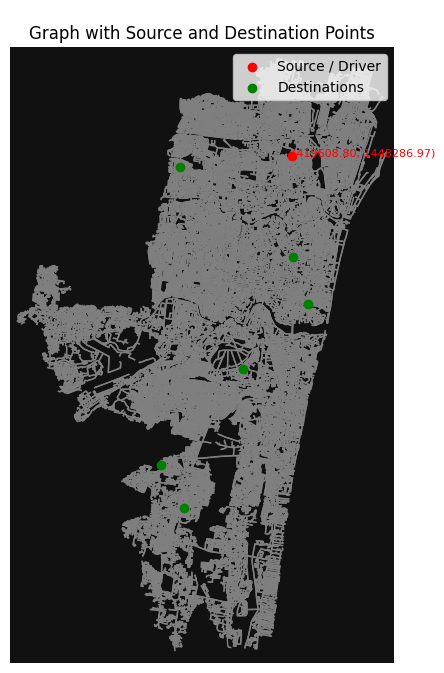

In [9]:
import osmnx as ox
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Define the place to fetch the street network
place_name = "Chennai, Tamil Nadu, 600001, India"

# Fetch the street network
G = ox.graph_from_place(place_name, network_type='all')

# Project the graph to UTM
G = ox.project_graph(G)

# Get positions for the nodes
pos = {node: (data['x'], data['y']) for node, data in G.nodes(data=True)}

# Generate some random source and destination nodes
nodes = list(G.nodes)
num_sources = 1
num_destinations = 6
sources = np.random.choice(nodes, num_sources, replace=False)
destinations = np.random.choice(nodes, num_destinations, replace=False)

# Plot the graph
plt.figure(figsize=(10, 10))
ox.plot_graph(G, show=False, close=False, node_size=0, edge_color='gray')

# Plot source points in red
source_pos = {node: pos[node] for node in sources}
plt.scatter(*zip(*source_pos.values()), c='red', label='Source / Driver', zorder=5)

# Plot destination points in green
destination_pos = {node: pos[node] for node in destinations}
plt.scatter(*zip(*destination_pos.values()), c='green', label='Destinations', zorder=5)

# Add coordinates text to source points
for node, (x, y) in source_pos.items():
    plt.text(x, y, f"({x:.2f}, {y:.2f})", fontsize=8, color='red')


# Add legend and show plot
plt.legend()
plt.title('Graph with Source and Destination Points')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [4]:
!pip install ant_colony

<Figure size 1000x1000 with 0 Axes>

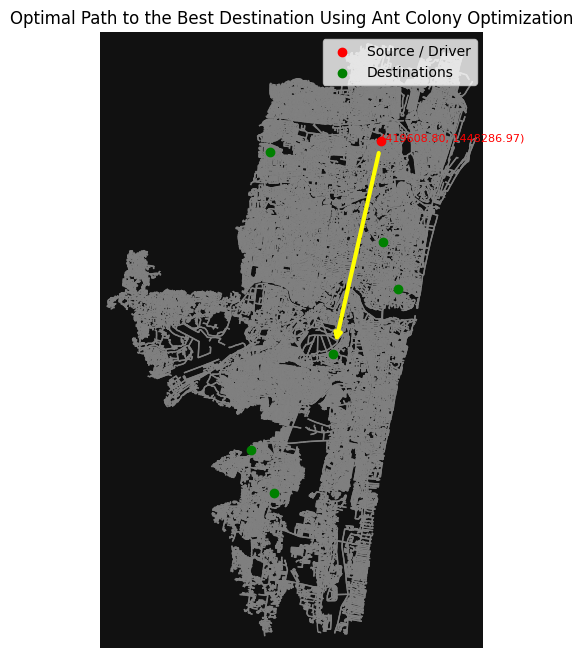

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox

def distance(point1, point2):
    return np.sqrt(np.sum((np.array(point1) - np.array(point2))**2))

def ant_colony_optimization(G, pos, source, target, n_ants, n_iterations, alpha, beta, evaporation_rate, Q):
    nodes = [source, target]
    pheromone = np.ones((2, 2))
    best_path = None
    best_path_length = np.inf

    for iteration in range(n_iterations):
        path = [0]
        current_point = 0
        visited = [False, False]
        visited[current_point] = True
        path_length = 0

        for _ in range(1):
            next_point = 1
            path.append(next_point)
            path_length += distance(pos[nodes[current_point]], pos[nodes[next_point]])
            current_point = next_point

        if path_length < best_path_length:
            best_path = path
            best_path_length = path_length

        pheromone *= evaporation_rate
        pheromone[0, 1] += Q / path_length
        pheromone[1, 0] += Q / path_length

    return best_path, best_path_length, nodes

# Calculate distances between all destination nodes and determine the most clustered destination
def find_best_destination(pos, destinations, radius=0.01):
    best_node = None
    max_neighbors = -1

    for node in destinations:
        neighbors = sum(1 for other_node in destinations if distance(pos[node], pos[other_node]) <= radius)
        if neighbors > max_neighbors:
            max_neighbors = neighbors
            best_node = node

    return best_node

# Find the best destination node that is close to other destination nodes
best_destination = find_best_destination(pos, destinations)

# Ant Colony Optimization Parameters
n_ants = 10
n_iterations = 100
alpha = 1.0
beta = 2.0
evaporation_rate = 0.5
Q = 100

# Run Ant Colony Optimization from the source to the best destination
best_path, best_path_length, nodes = ant_colony_optimization(G, pos, sources[0], best_destination, n_ants, n_iterations, alpha, beta, evaporation_rate, Q)

# Extract the optimal path nodes
optimal_path_nodes = [nodes[i] for i in best_path]

# Plot the graph with the optimal path highlighted
plt.figure(figsize=(10, 10))
ox.plot_graph(G, show=False, close=False, node_size=0, edge_color='gray')

# Plot the optimal path in yellow
optimal_path_edges = list(zip(optimal_path_nodes[:-1], optimal_path_nodes[1:]))
optimal_path_pos = {node: pos[node] for node in optimal_path_nodes}
nx.draw_networkx_edges(G, pos, edgelist=optimal_path_edges, edge_color='yellow', width=3)

# Plot the source and destination points again
plt.scatter(*zip(*{node: pos[node] for node in sources}.values()), c='red', label='Source / Driver')
plt.scatter(*zip(*{node: pos[node] for node in destinations}.values()), c='green', label='Destinations')

# Add coordinates text to source points
for node, (x, y) in {node: pos[node] for node in sources}.items():
    plt.text(x, y, f"({x:.2f}, {y:.2f})", fontsize=8, color='red')

# Add legend and show plot
plt.legend()
plt.title('Optimal Path to the Best Destination Using Ant Colony Optimization')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


Best Destination Point: 9914806628, Coordinates: (585911.9052374691, 4514421.601425506)


<Figure size 1000x1000 with 0 Axes>

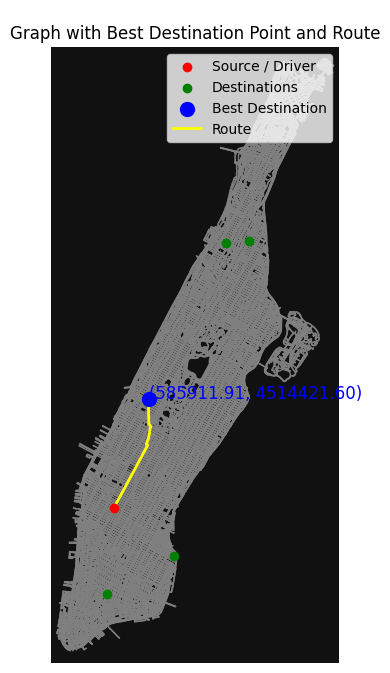

In [ ]:
import random

# Function to calculate the sum of distances to other points
def calculate_total_distance(point, other_points):
    return sum(nx.shortest_path_length(G, point, other_point, weight='length') for other_point in other_points)

# Initialize variables for the best destination search
best_destination = None
best_cost = float('inf')

# Evaluate each destination point
for destination in destinations:
    total_distance = calculate_total_distance(destination, destinations)
    if total_distance < best_cost:
        best_cost = total_distance
        best_destination = destination

# Display the best destination point
print(f"Best Destination Point: {best_destination}, Coordinates: {pos[best_destination]}")

# Plot the graph again with the best destination point highlighted and the route from source
plt.figure(figsize=(10, 10))
ox.plot_graph(G, show=False, close=False, node_size=0, edge_color='gray')

# Plot source points in red
plt.scatter(*zip(*source_pos.values()), c='red', label='Source / Driver', zorder=5)

# Plot destination points in green
plt.scatter(*zip(*destination_pos.values()), c='green', label='Destinations', zorder=5)

# Highlight the best destination point in blue
plt.scatter(*pos[best_destination], c='blue', label='Best Destination', s=100, zorder=10)

# Add coordinates text to the best destination point
plt.text(pos[best_destination][0], pos[best_destination][1], f"({pos[best_destination][0]:.2f}, {pos[best_destination][1]:.2f})", fontsize=12, color='blue')

# Plot the route from source to the best destination point in yellow
for source in sources:
    route = nx.shortest_path(G, source, best_destination, weight='length')
    route_coords = [(pos[node][0], pos[node][1]) for node in route]
    route_lat, route_lon = zip(*route_coords)
    plt.plot(route_lat, route_lon, c='yellow', linewidth=2, label='Route')

# Add legend and show plot
plt.legend()
plt.title('Graph with Best Destination Point and Route')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
